In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df1 = pd.read_csv("original_data_results.csv")
df1.columns = ["Models", "Misclassification","MCC","dataType"]
df2 = pd.read_csv("additional_data_results.csv")
df2.columns = ["Models", "Misclassification","MCC","dataType"]

In [16]:
df1

,Models,Misclassification,MCC,dataType
0,MultinomialNB,0.791199,0.550465,original
1,LogisticReg,0.800690,0.564680,original
2,SVC,0.783434,0.520427,original
3,RandomForest,0.792925,0.550321,original


In [17]:
df2

,Models,Misclassification,MCC,dataType
0,MultinomialNB,0.440264,0.163850,additional
1,LogisticReg,0.707677,0.266147,additional
2,SVC,0.702593,0.138038,additional
3,RandomForest,0.726487,0.270997,additional


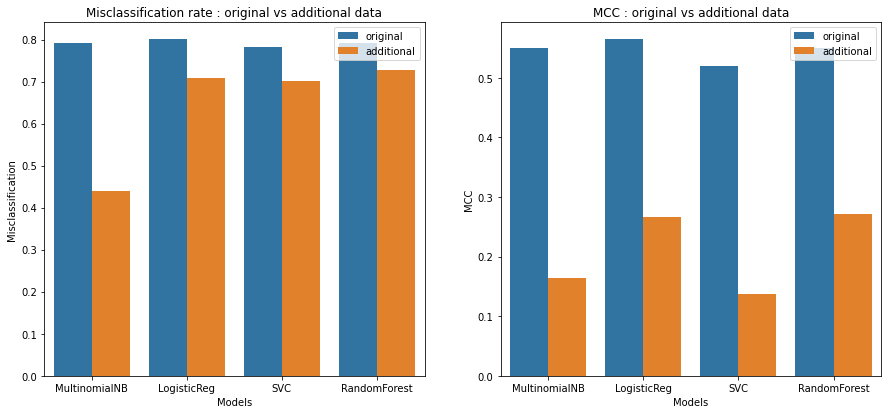

In [42]:
stats = pd.concat([df1.reset_index(), df2.reset_index()], ignore_index=True)
fig, axes = plt.subplots(1,2,figsize=(15,6.5))

sns.barplot(ax = axes[0], x="Models", y="Misclassification", hue="dataType", data=stats)
axes[0].set(title="Misclassification rate : original vs additional data", xlabel="Models")
axes[0].legend(loc="upper right")
sns.barplot(ax = axes[1], x="Models", y="MCC", hue="dataType", data=stats)
axes[1].set(title="MCC : original vs additional data", xlabel="Models")
axes[1].legend(loc="upper right")

plt.show()

- Comparison Process :
    - Preprocess :
        - use both original data and additional data to form word feature that corresponds to dimensions of countvector()
    - Train :
        - Train on 80% of original Data
    - Test :
        - 1) Test accuracy on 20% of original data
        - 2) Test accuracy on new additional dataset

- Result Analysis :
    - Missclassification Rate :
        - We can see that misclassification accuracy decreased around 40% for MultinomialNB and around 10% for Logistic Regression, SVC, and Random Forest
        - This implies :
            - (1) testing accuracy is dependent on training dataset
            - (2) human's subjectivity of labeling the training dataset affects the performance
    - MCC :
        - We can see that performance is much lower in Matthew Correlation Matrix for predicting additional data
        - One reason behind could be that we are trying to predict imbalanced dataset after training on balanced dataset. (ASK???)
            - Note that MCC formula is ( TP X TN ) - ( FP X FN ) / SQRT( (TP+FP)(TP+FN)(TN+FP)(TN+FN) )
            - When comparing the confusion matrixs we can see that its accuracy is very low when true Y = 0...

In [44]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "original_confusion_matrix.png")

In [45]:
Image(url= "additional_confusion_matrix.png")